<a href="https://colab.research.google.com/github/Pritamck13/Machine-Learning/blob/main/CATS_VS_DOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cats vs Dogs **

---



In [ ]:
pip install -q keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
!rm -rf /content/CATS_DOGS/test1/dogs

In [ ]:
!unzip -q  /content/drive/MyDrive/CATS_DOGS.zip -d /content/


In [ ]:
!unzip -q  /content/drive/MyDrive/train.zip -d /content/CATS_DOGS/train

In [ ]:
import tensorflow as tf
import os
import shutil

In [ ]:
train_data = '/content/CATS_DOGS/train'
test_data = '/content/CATS_DOGS/test1'
validation_data ='/content/CATS_DOGS/validation' 

In [ ]:
train_cats_dir = os.path.join(train_data,'cats')
os.mkdir(train_cats_dir)

  

In [ ]:
train_dogs_dir = os.path.join(train_data,'dogs')
os.mkdir(train_dogs_dir)



In [ ]:

test_dogs_dir = os.path.join(test_data,'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
test_cats_dir = os.path.join(test_data,'cats')
os.mkdir(test_cats_dir)


In [ ]:
validation_dir = os.path.join('/content/CATS_DOGS','validation')
os.mkdir(validation_dir)




validation_cats_dir = os.path.join(validation__dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation__dir,'dogs')
os.mkdir(validation_dogs_dir)

In [ ]:
fnames = [f'cat.{i}.jpg' for i in range(3000)]
for fn in fnames:
  search = os.path.join('/content/CATS_DOGS/train/train',fn)
  dst = os.path.join('/content/CATS_DOGS/train/cats',fn)
  shutil.copy(search,dst)

fnames = [f'cat.{i}.jpg' for i in range(3000,5500)]
for fn in fnames:
  search = os.path.join('/content/CATS_DOGS/train/train',fn)
  dst = os.path.join('/content/CATS_DOGS/validation/cats',fn)
  shutil.copy(search,dst)


fnames = [f'cat.{i}.jpg' for i in range(5500,8000)]
for fn in fnames:
  search = os.path.join('/content/CATS_DOGS/train/train',fn)
  dst = os.path.join('/content/CATS_DOGS/test1/cats',fn)
  shutil.copy(search,dst)




In [ ]:
fnames = [f'dog.{i}.jpg' for i in range(3000)]
for fn in fnames:
  search = os.path.join('/content/CATS_DOGS/train/train',fn)
  dst = os.path.join('/content/CATS_DOGS/train/dogs',fn)
  shutil.copy(search,dst)

fnames = [f'dog.{i}.jpg' for i in range(3000,5500)]
for fn in fnames:
  search = os.path.join('/content/CATS_DOGS/train/train',fn)
  dst = os.path.join('/content/CATS_DOGS/validation/dogs',fn)
  shutil.copy(search,dst)






In [ ]:
fnames = [f'dog.{i}.jpg' for i in range(5500,8000)]
for fn in fnames:
  search = os.path.join('/content/CATS_DOGS/train/train/train',fn)
  dst = os.path.join('/content/CATS_DOGS/test1/dogs',fn)
  shutil.copy(search,dst)

In [ ]:
print('total training cat images:', len(os.listdir('/content/CATS_DOGS/train/cats')))

total training cat images: 3000


In [ ]:
print('total testing cat images:', len(os.listdir('/content/CATS_DOGS/test1/cats')))

total testing cat images: 2500


In [ ]:
print('total training cat images:', len(os.listdir('/content/CATS_DOGS/train/dogs')))

total training cat images: 3000


In [ ]:
print('total testing cat images:', len(os.listdir('/content/CATS_DOGS/test1/dogs')))

total testing cat images: 2500


In [ ]:
print('total validation cat images:', len(os.listdir('/content/CATS_DOGS/validation/cats')))

total validation cat images: 2500


In [ ]:
print('total validation dog images:', len(os.listdir('/content/CATS_DOGS/validation/dogs')))

total validation dog images: 2500


In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [ ]:
#Data preprocessing
#Data should be transformed into preprocessed floating point tensors before feeding into the network

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = training_datagen.flow_from_directory(train_data,target_size=(150,150),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(validation_data,target_size=(150,150),batch_size=20,class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
from keras.callbacks import EarlyStopping
early_stop =  EarlyStopping(monitor='val_acc',patience = 5)

In [ ]:
history= model.fit(train_generator,steps_per_epoch=100,epochs=50,validation_data=test_generator,callbacks=early_stop,validation_steps=50)

Epoch 1/50
100/100 [==============================] - 9s 87ms/step - loss: 0.7008 - acc: 0.4907 - val_loss: 0.6887 - val_acc: 0.4990
Epoch 2/50
100/100 [==============================] - 9s 85ms/step - loss: 0.6779 - acc: 0.5629 - val_loss: 0.6713 - val_acc: 0.5590
Epoch 3/50
100/100 [==============================] - 9s 85ms/step - loss: 0.6438 - acc: 0.6278 - val_loss: 0.6277 - val_acc: 0.6660
Epoch 4/50
100/100 [==============================] - 9s 86ms/step - loss: 0.6126 - acc: 0.6809 - val_loss: 0.5831 - val_acc: 0.6990
Epoch 5/50
100/100 [==============================] - 9s 85ms/step - loss: 0.5958 - acc: 0.6920 - val_loss: 0.5975 - val_acc: 0.6730
Epoch 6/50
100/100 [==============================] - 9s 86ms/step - loss: 0.5805 - acc: 0.6858 - val_loss: 0.5496 - val_acc: 0.7150
Epoch 7/50
100/100 [==============================] - 9s 85ms/step - loss: 0.5644 - acc: 0.7075 - val_loss: 0.5639 - val_acc: 0.7010
Epoch 8/50
100/100 [==============================] - 9s 87ms/step - 

In [ ]:
model.save('cats_vs_dogs_final.h5')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

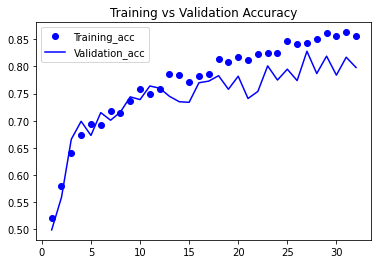

In [ ]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label ='Training_acc')
plt.plot(epochs,val_acc,'b',label = 'Validation_acc')
plt.title('Training vs Validation Accuracy')
plt.legend()

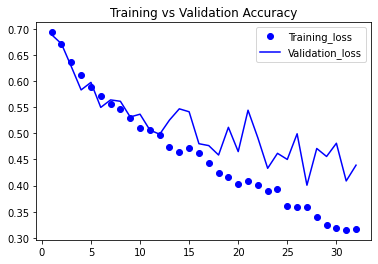

In [ ]:
plt.plot(epochs,loss,'bo',label ='Training_loss')
plt.plot(epochs,val_loss,'b',label = 'Validation_loss')
plt.title('Training vs Validation Accuracy')
plt.legend()

In [ ]:
test_generator = test_datagen.flow_from_directory('/content/CATS_DOGS/test1',target_size=(150,150),batch_size = 20,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [ ]:
from keras.models import load_model
model = load_model('cats_vs_dogs_final.h5')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
test_loss,test_acc = model.evaluate(test_generator,steps = 50)
print('test acc :', test_acc)

50/50 [==============================] - 3s 54ms/step - loss: 0.5183 - acc: 0.7720
test acc : 0.7720000147819519
